In [1]:
require(ggplot2)
require(data.table)
require(Hmisc)

Loading required package: ggplot2
Loading required package: data.table
Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



In [2]:
# install.packages('bit64')

In [3]:
directory = "/mnt/sdb1/baseerat/numerical-evals/11-29-2017/logs-1M"
plotTheme <- theme(legend.title=element_blank(), legend.position="top", legend.text=element_text(size=6))

In [14]:
ruleCountPerLeaf <- fread(paste(directory, "rule_count_per_leaf.csv", sep="/"), sep=",", header=TRUE)

In [15]:
head(ruleCountPerLeaf)

,leafId,numRules,groupSizeDist,placementDist,colocateNumHostsPerLeaf,seed,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf
1,0,10000,uniform,colocate-random-random,12,0,exact-match,10,3,0,10000
2,1,10000,uniform,colocate-random-random,12,0,exact-match,10,3,0,10000
3,2,10000,uniform,colocate-random-random,12,0,exact-match,10,3,0,10000
4,3,10000,uniform,colocate-random-random,12,0,exact-match,10,3,0,10000
5,4,10000,uniform,colocate-random-random,12,0,exact-match,10,3,0,10000
6,5,10000,uniform,colocate-random-random,12,0,exact-match,10,3,0,10000


In [17]:
plt <- ggplot(ruleCountPerLeaf) +
    geom_boxplot(aes(y=numRules, x=factor(numBitmaps), 
                     fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
                 outlier.size=0.5) +
    facet_grid(groupSizeDist * numRulesPerLeaf ~ factor(colocateNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
    xlab("Number of bitmaps") +
    ylab("Number of rules") +
    plotTheme
ggsave(plt, file="rule_count_per_leaf.pdf", height=5, width=7)

In [7]:
groupSizePerGroupPerTenant <- fread(paste(directory, "group_size_per_group_per_tenant.csv", sep="/"), sep=",", 
                                    header=TRUE)

Read 1997000 rows and 11 (of 11) columns from 0.129 GB file in 00:00:03


In [8]:
head(groupSizePerGroupPerTenant)

,groupId,groupSize,groupSizeDist,placementDist,colocateNumHostsPerLeaf,seed,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf
1,0,103,uniform,colocate-random-random,24,0,exact-match,10,3,0,10000
2,1,107,uniform,colocate-random-random,24,0,exact-match,10,3,0,10000
3,2,91,uniform,colocate-random-random,24,0,exact-match,10,3,0,10000
4,3,124,uniform,colocate-random-random,24,0,exact-match,10,3,0,10000
5,4,29,uniform,colocate-random-random,24,0,exact-match,10,3,0,10000
6,5,176,uniform,colocate-random-random,24,0,exact-match,10,3,0,10000


In [9]:
plt <- ggplot(groupSizePerGroupPerTenant) +
   stat_ecdf(aes(x=groupSize)) +
   facet_grid(. ~ groupSizeDist) +
   ggtitle("CDF") +
   xlab("Group Size Distributions") +
   plotTheme
ggsave(plt, file="group_size_per_group_per_tenant.pdf", height=3, width=7)

In [3]:
groupsCoveredWithBitmapsOnly <- fread(paste(directory, "groups_covered_with_bitmaps_only.csv", sep="/"), sep=",", 
                                      header=TRUE)

In [5]:
plt <- ggplot(groupsCoveredWithBitmapsOnly) +
   geom_bar(aes(y=groupsCoveredWithoutDefaultBitmap, x=factor(numBitmaps), 
                fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap)),
            stat="identity",position=position_dodge()) +
   facet_grid(groupSizeDist * numRulesPerLeaf ~ factor(colocateNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
   xlab("Number of bitmaps") +
   ylab("Groups covered (without default bitmap)") +
   plotTheme
ggsave(plt, file="groups_covered_with_bitmaps_only.pdf", height=5, width=7)

In [10]:
leafSpineOverhead <- fread(paste(directory, "leaf_spine_overhead_per_group_per_tenant.csv", sep="/"), sep=",", 
                           header=TRUE)

In [11]:
head(leafSpineOverhead)

,groupSizeDist,placementDist,colocateNumHostsPerLeaf,algorithm,numBitmaps,numLeafsPerBitmap,redundancyPerBitmap,numRulesPerLeaf,seed,unicastTraffic,multicastTraffic,baseeratTraffic,overlayTraffic
1,uniform,colocate-random-random,12,exact-match,10,3,0,10000,0,1.15879649246735e-314,664912636,1.49315522165229e-314,1325831272
2,uniform,colocate-random-random,12,exact-match,10,3,0,64000,0,1.15879649246735e-314,664912636,8.89574688808549e-315,1325831272
3,uniform,colocate-random-random,12,exact-match,20,3,0,10000,0,1.15879649246735e-314,664912636,1.36018398165756e-314,1325831272
4,uniform,colocate-random-random,12,exact-match,20,3,0,64000,0,1.15879649246735e-314,664912636,7.53952405205205e-315,1325831272
5,uniform,colocate-random-random,12,exact-match,30,3,0,10000,0,1.15879649246735e-314,664912636,1.26939142772241e-314,1325831272
6,uniform,colocate-random-random,12,exact-match,30,3,0,64000,0,1.15879649246735e-314,664912636,6.62069072405726e-315,1325831272


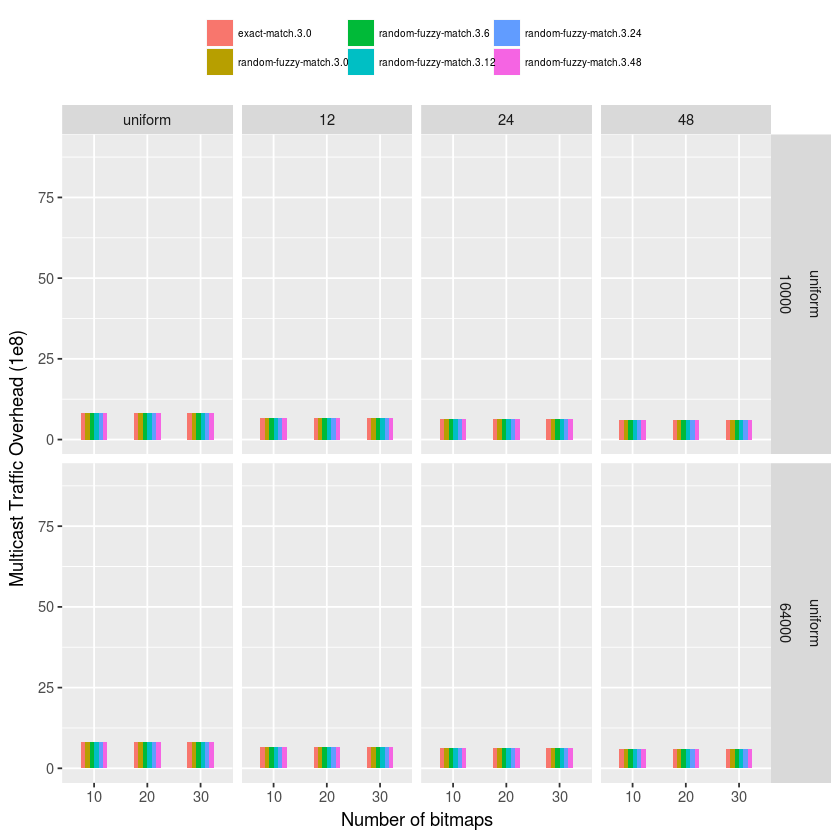

In [57]:
ggplot(leafSpineOverhead[groupSizeDist == "uniform"], aes(y=multicastTraffic/1e8, x=factor(numBitmaps), 
                              fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * numRulesPerLeaf ~ factor(colocateNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
    ylim(c(0, 90)) +
    xlab("Number of bitmaps") +
    ylab("Multicast Traffic Overhead (1e8)") +
    plotTheme

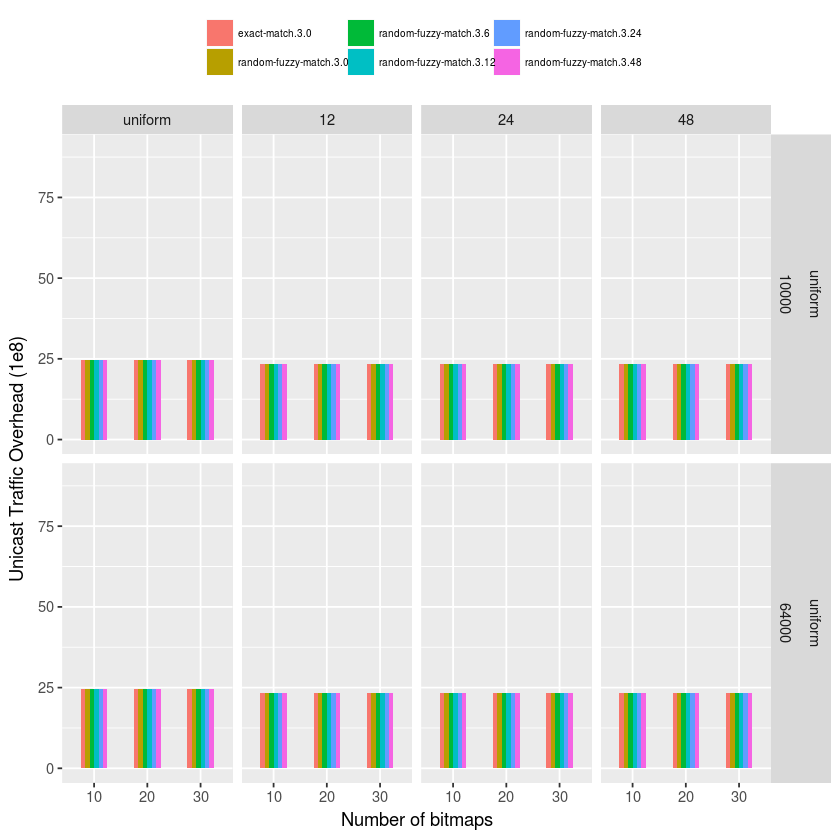

In [58]:
ggplot(leafSpineOverhead[groupSizeDist == "uniform"], aes(y=unicastTraffic/1e8, x=factor(numBitmaps), 
                              fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * numRulesPerLeaf ~ factor(colocateNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
    ylim(c(0, 90)) +
    xlab("Number of bitmaps") +
    ylab("Unicast Traffic Overhead (1e8)") +
    plotTheme

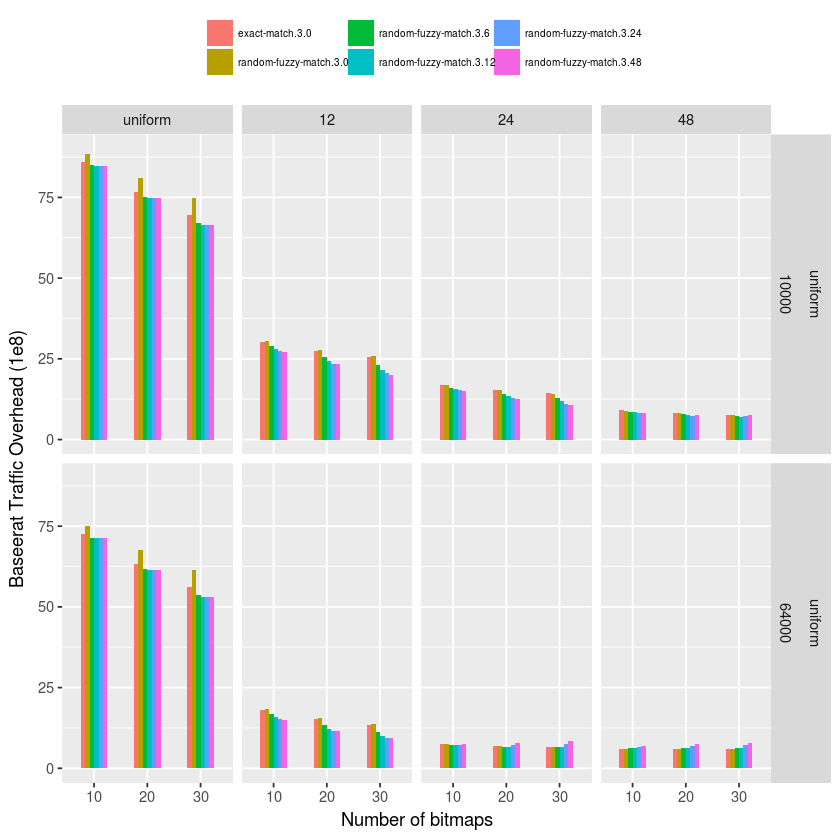

In [59]:
ggplot(leafSpineOverhead[groupSizeDist == "uniform"], aes(y=baseeratTraffic/1e8, x=factor(numBitmaps), 
                              fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * numRulesPerLeaf ~ factor(colocateNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
    ylim(c(0, 90)) +
    xlab("Number of bitmaps") +
    ylab("Baseerat Traffic Overhead (1e8)") +
    plotTheme

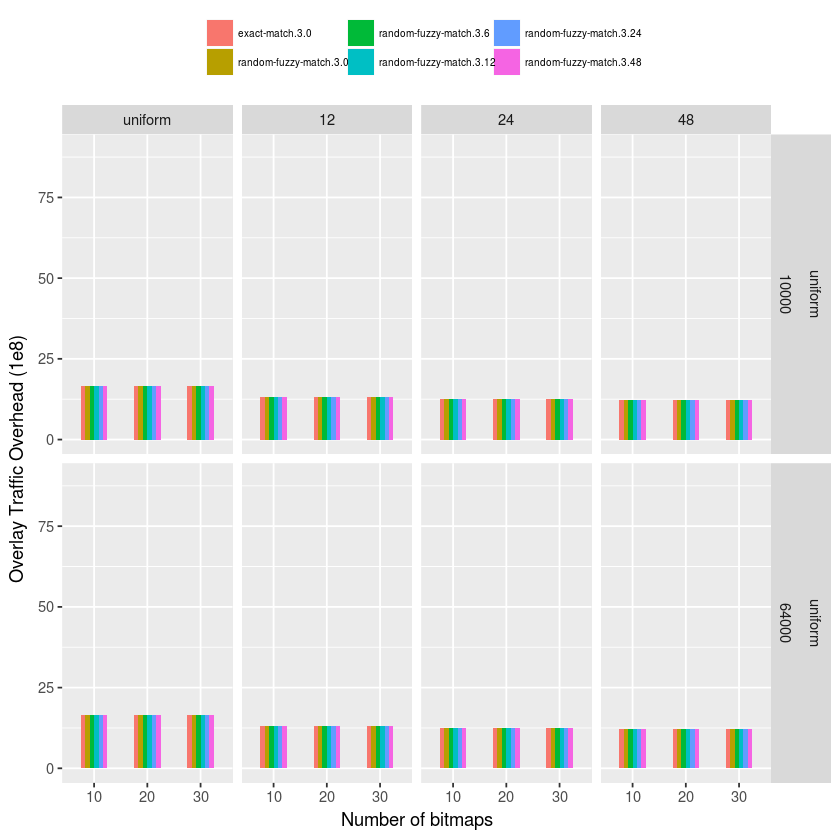

In [60]:
ggplot(leafSpineOverhead[groupSizeDist == "uniform"], aes(y=overlayTraffic/1e8, x=factor(numBitmaps), 
                              fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * numRulesPerLeaf ~ factor(colocateNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
    ylim(c(0, 90)) +
    xlab("Number of bitmaps") +
    ylab("Overlay Traffic Overhead (1e8)") +
    plotTheme

In [61]:
plt <- ggplot(leafSpineOverhead, aes(y=unicastTraffic/multicastTraffic, x=factor(numBitmaps), 
                              fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * numRulesPerLeaf ~ factor(colocateNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
    ylim(c(0, 12)) +
    xlab("Number of bitmaps") +
    ylab("Unicast-to-Multicast Traffic Overhead") +
    plotTheme
ggsave(plt, file="leaf_spine_unicast_overhead_per_group_per_tenant.pdf", height=5, width=7)

In [62]:
plt <- ggplot(leafSpineOverhead, aes(y=baseeratTraffic/multicastTraffic, x=factor(numBitmaps), 
                              fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * numRulesPerLeaf ~ factor(colocateNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
    ylim(c(0, 12)) +
    xlab("Number of bitmaps") +
    ylab("Baseerat-to-Multicast Traffic Overhead") +
    plotTheme
ggsave(plt, file="leaf_spine_baseerat_overhead_per_group_per_tenant.pdf", height=5, width=7)

In [63]:
plt <- ggplot(leafSpineOverhead, aes(y=overlayTraffic/multicastTraffic, x=factor(numBitmaps), 
                              fill=interaction(algorithm, numLeafsPerBitmap, redundancyPerBitmap))) +
    stat_summary(fun.y = mean, geom = "bar", position=position_dodge(0.5), width=0.5) +
    facet_grid(groupSizeDist * numRulesPerLeaf ~ factor(colocateNumHostsPerLeaf, levels=c('uniform','12','24','48'))) +
    ylim(c(0, 12)) +
    xlab("Number of bitmaps") +
    ylab("Traffic Overhead") +
    plotTheme
ggsave(plt, file="leaf_spine_overlay_overhead_per_group_per_tenant.pdf", height=5, width=7)